In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statistics import mean
from sklearn.model_selection import cross_val_score

In [2]:
accidents_raw = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone Project 2/ADM Project - Road Accidents in U.K/Accidents_categorical.csv', encoding='Latin-1')

In [164]:
accidents_raw.head()

,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,...,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,201001BS70015,51.492045,-0.178376,London,Urban,A,2,30,Dual carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,1896,Heavy oil,Volkswagen,Taxi,Going ahead,Slight
1,201001BS70034,51.485058,-0.168572,London,Urban,B,8,30,Single carriageway,Dry,...,T or staggered junction,Mid Junction - on roundabout or on main road,Front,Other/Not known,599,Petrol,Honda,Motorcycle,Going ahead,Slight
2,201001BS70040,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
3,201001BS70045,51.494743,-0.195845,London,Urban,A,7,30,Single carriageway,Wet or damp,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Offside,Other/Not known,649,Petrol,Other,Motorcycle,Moving off,Slight
4,201001BS70060,51.514170,-0.207760,London,Urban,B,5,30,Single carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,600,Petrol,Suzuki,Motorcycle,Going ahead,Slight


In [39]:
accidents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251832 entries, 0 to 251831
Data columns (total 34 columns):
Accident_Index             251832 non-null object
Latitude                   251832 non-null float64
Longitude                  251832 non-null float64
Region                     251832 non-null object
Urban_or_Rural_Area        251832 non-null object
X1st_Road_Class            251832 non-null object
Driver_IMD_Decile          251832 non-null int64
Speed_limit                251832 non-null int64
Road_Type                  251832 non-null object
Road_Surface_Conditions    251832 non-null object
Weather                    251832 non-null object
High_Wind                  251832 non-null object
Lights                     251832 non-null object
Datetime                   251832 non-null object
Year                       251832 non-null int64
Season                     251832 non-null int64
Month_of_Year              251832 non-null int64
Day_of_Month               251832 non-null

In [40]:
accidents_raw.describe()

,Latitude,Longitude,Driver_IMD_Decile,Speed_limit,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Engine_CC,hour_of_day
count,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.000000,251832.00000
mean,52.341463,-1.178765,5.470369,39.535921,2011.989104,2.460541,6.554870,15.638255,3.916722,0.589514,1.957809,3.902923,7.557661,1570.733934,14.14833
std,1.160963,1.215054,2.826487,14.182828,1.411094,1.100914,3.409881,8.748529,1.929438,0.207056,0.684528,1.797909,4.503684,591.465136,4.96935
min,49.915001,-6.530040,1.000000,20.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.001000,1.000000,1.000000,1.000000,10.000000,0.02400
25%,51.436612,-2.029776,3.000000,30.000000,2011.000000,1.000000,4.000000,8.000000,2.000000,0.434000,2.000000,3.000000,4.000000,1242.000000,10.41600
50%,52.131834,-1.208209,5.000000,30.000000,2012.000000,2.000000,7.000000,16.000000,4.000000,0.618000,2.000000,4.000000,7.000000,1596.000000,14.83200
75%,53.384119,-0.199958,8.000000,50.000000,2013.000000,3.000000,10.000000,23.000000,6.000000,0.742000,2.000000,5.000000,11.000000,1970.000000,17.80800
max,58.893008,1.758661,10.000000,70.000000,2014.000000,4.000000,12.000000,31.000000,7.000000,0.999000,5.000000,8.000000,30.000000,3500.000000,23.97600


In [3]:
accidents_raw['hour_of_day'] = accidents_raw['Hour_of_Day'] * 24

In [6]:
len(accidents_raw['Age_of_Driver'].unique())

8

1 = 16-19 <br>
2 = 20-29 <br>
3 = 30-39 <br>
4 = 40-49 <br>
5 = 50-59 <br>
6 = 60-69 <br>
7 = 70-79 <br>
8 = +80

In [4]:
non_numeric_columns = accidents_raw.select_dtypes(['object']).columns
numeric_columns = accidents_raw.select_dtypes(['int64', 'float64']).columns

In [43]:
accidents_raw[numeric_columns].nunique()

Latitude              193068
Longitude             195408
Driver_IMD_Decile         10
Speed_limit                6
Year                       5
Season                     4
Month_of_Year             12
Day_of_Month              31
Day_of_Week                7
Hour_of_Day              999
Number_of_Vehicles         5
Age_of_Driver              8
Age_of_Vehicle            30
Engine_CC                901
hour_of_day              999
dtype: int64

In [44]:
accidents_raw[non_numeric_columns].nunique()

Accident_Index             210056
Region                         11
Urban_or_Rural_Area             2
X1st_Road_Class                 6
Road_Type                       5
Road_Surface_Conditions         5
Weather                         6
High_Wind                       2
Lights                          4
Datetime                   182109
Junction_Detail                 8
Junction_Location               9
X1st_Point_of_Impact            5
Driver_Journey_Purpose          5
Propulsion_Code                 2
Vehicle_Make                   25
Vehicle_Category                6
Vehicle_Manoeuvre              11
Accident_Severity               2
dtype: int64

In [5]:
accidents = accidents_raw.drop(['Accident_Index', 'Hour_of_Day'], axis = 1)

change_columns = ['Driver_IMD_Decile', 'Season', 'Day_of_Week', 'Age_of_Driver', 'Speed_limit', 'Year', 'Month_of_Year',
       'Day_of_Month', 'Number_of_Vehicles', 'Age_of_Vehicle']
for index, column in enumerate(change_columns):
    accidents[change_columns[index]] = accidents[change_columns[index]].astype(str)

In [6]:
numeric_columns2 = accidents.select_dtypes(['int64', 'float64']).columns

# Accidents Severity

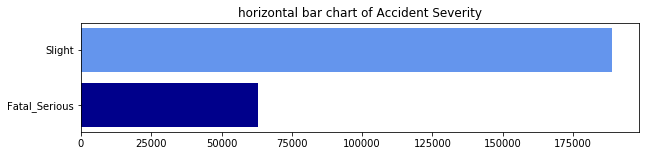

In [34]:
plt.figure(figsize=(10,2))
plt.barh(accidents.groupby("Accident_Severity")["Accident_Severity"].count().index, 
        accidents.groupby("Accident_Severity")["Accident_Severity"].count(), 
        color=["darkblue", "cornflowerblue"])
plt.title("horizontal bar chart of Accident Severity")
plt.show()

In [104]:
print('Percentage of slight accidents to all accidents = {} %' .format(len(accidents.loc[(accidents['Accident_Severity'] == "Slight")])*100/len(accidents)))

Percentage of slight accidents to all accidents = 75.05638679754757 %


## Severity of the Accidents Over Time

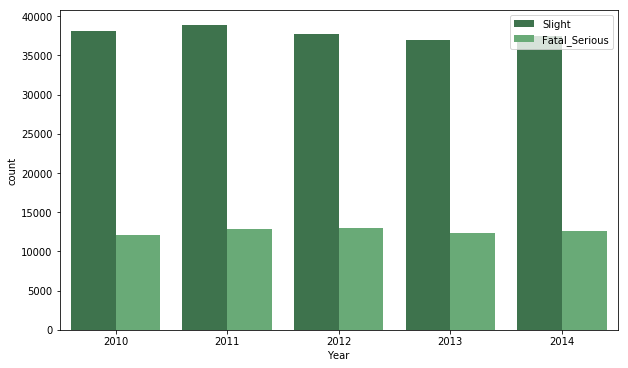

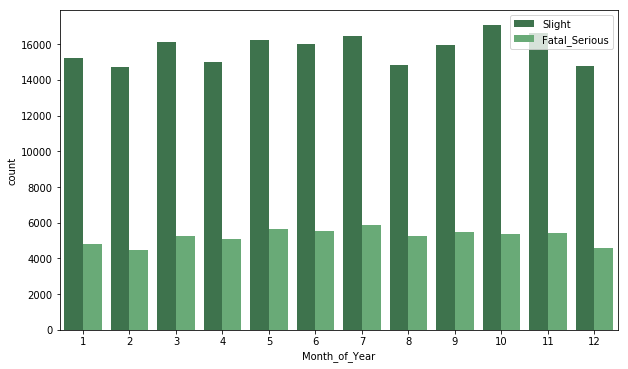

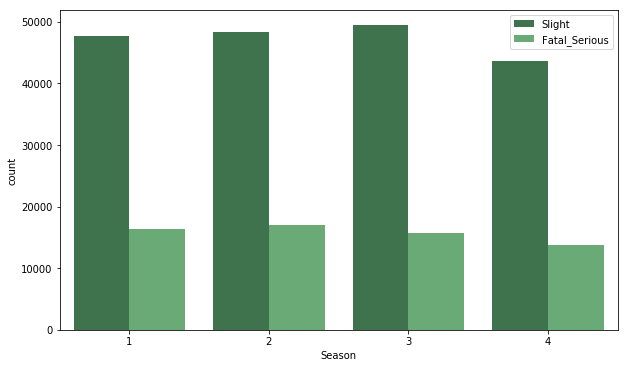

In [153]:
time_features = ['Year', 'Month_of_Year', 'Season']

for index, column in enumerate(time_features):
    plt.figure(figsize=(10, 20))
    plt.subplot(3, 1, index+1)
    sns.countplot(x = time_features[index], hue = 'Accident_Severity', data = accidents_raw, palette="Greens_d")
    plt.legend(loc='upper right')
plt.show()

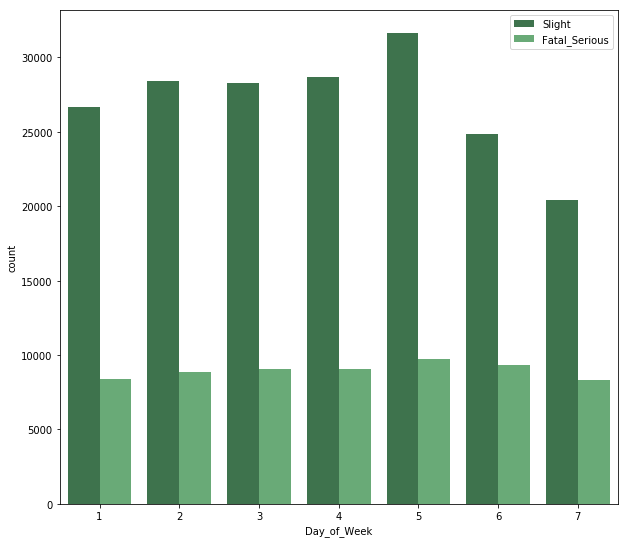

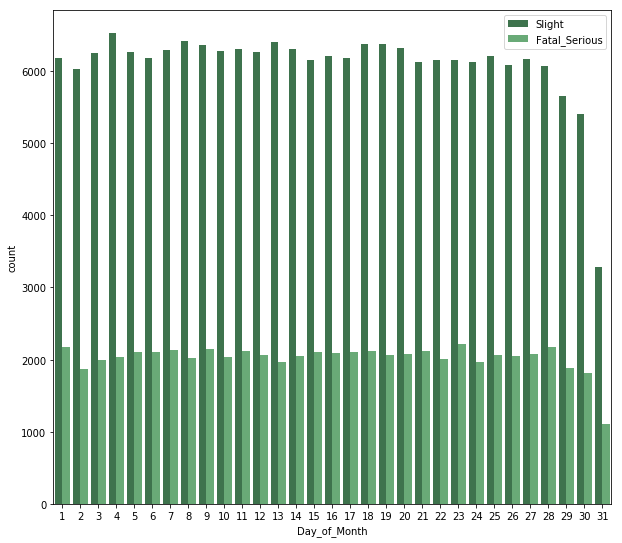

In [76]:
time_features2 = ['Day_of_Week', 'Day_of_Month']

for index, column in enumerate(time_features2):
    plt.figure(figsize=(10, 20))
    plt.subplot(2, 1, index+1)
    sns.countplot(x = time_features2[index], hue = 'Accident_Severity', data = accidents_raw, palette="Greens_d")
    plt.legend(loc='upper right')

In [77]:
time_features_all = ['Year', 'Month_of_Year', 'Season', 'Day_of_Week', 'Day_of_Month']

for index, column in enumerate(time_features_all):
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(accidents["Accident_Severity"], 
                                                                   accidents[time_features_all[index]]))
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(time_features_all[index]))
    print("------------------------------------------------")
    print("Chi2 Stat = {}, p value = {}".format(chi2_stat, p_val))

------------------------------------------------
Comparisons for variable: Year
------------------------------------------------
Chi2 Stat = 34.98142457799305, p value = 4.686340166576096e-07
------------------------------------------------
Comparisons for variable: Month_of_Year
------------------------------------------------
Chi2 Stat = 131.3619374055201, p value = 9.226940008272187e-23
------------------------------------------------
Comparisons for variable: Season
------------------------------------------------
Chi2 Stat = 95.48080434148324, p value = 1.4554053876693823e-20
------------------------------------------------
Comparisons for variable: Day_of_Week
------------------------------------------------
Chi2 Stat = 472.6636780972742, p value = 6.48748141586248e-99
------------------------------------------------
Comparisons for variable: Day_of_Month
------------------------------------------------
Chi2 Stat = 66.7007689815296, p value = 0.0001323498055399192


-------------------------------------------------------------
Year                       2010          2011          2012          2013  \
Accident_Severity                                                           
Fatal_Serious      12056.000000  12905.000000  12989.000000  12303.000000   
Slight             38073.000000  38836.000000  37698.000000  36992.000000   
total              50129.000000  51741.000000  50687.000000  49295.000000   
ratio                  0.316655      0.332295      0.344554      0.332585   

Year                       2014  
Accident_Severity                
Fatal_Serious      12563.000000  
Slight             37417.000000  
total              49980.000000  
ratio                  0.335756  
-------------------------------------------------------------
Month_of_Year                 1            10            11           12  \
Accident_Severity                                                          
Fatal_Serious       4810.000000   5378.000000   5436.0000

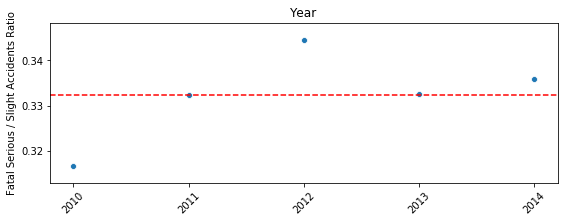

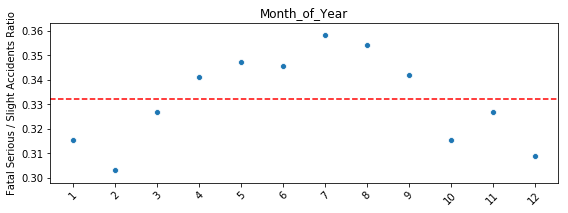

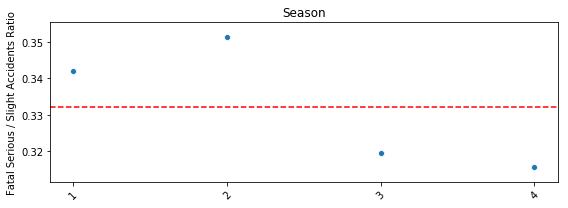

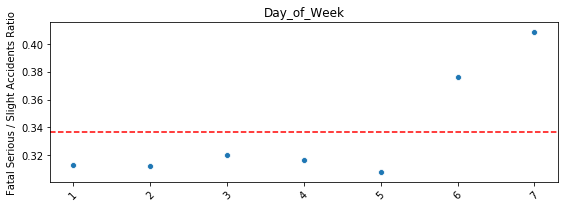

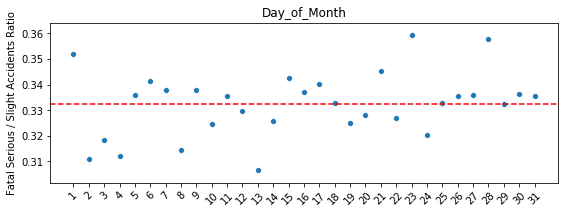

In [205]:
for index, column in enumerate(time_features_all):
    count_table = pd.crosstab(accidents["Accident_Severity"], accidents[time_features_all[index]])
    count_table.loc['total'] = count_table.loc['Fatal_Serious'] + count_table.loc['Slight']
    count_table.loc['ratio'] = count_table.loc['Fatal_Serious'] / count_table.loc['Slight']    
    table = count_table.iloc[(count_table.index == 'ratio'), :]
    loc = list(map(float, count_table.columns))
    plt.figure(figsize=(20,10))
    for row in table.iterrows():
        plt.subplot(3,2,index+1)
        sns.scatterplot(x= loc, y = row[1])
        plt.xticks(np.arange(min(loc), max(loc)+1, 1.0), rotation = 45)
        plt.title(time_features_all[index])
        plt.ylabel('Fatal Serious / Slight Accidents Ratio')
        plt.axhline(mean(row[1]), 0 ,max(loc)+1, color = 'red', linestyle = 'dashed')
    print ('-------------------------------------------------------------')
    print (count_table)

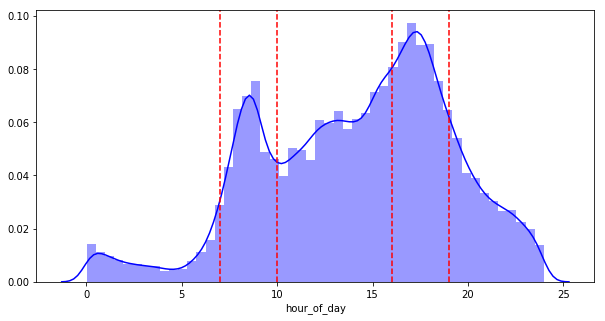

In [229]:
plt.figure(figsize = (10,5))
sns.distplot(accidents.hour_of_day, color = 'blue')
plt.axvline(7, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(10, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(16, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(19, 0 ,1, color = 'red', linestyle = 'dashed')

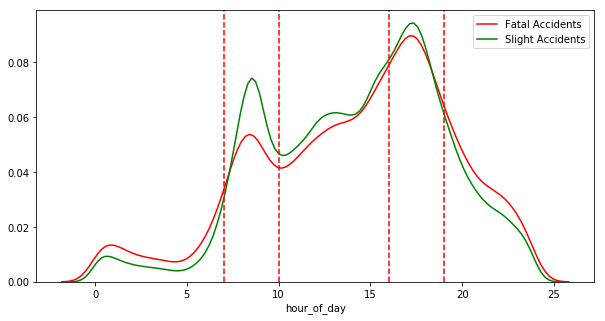

In [230]:
plt.figure(figsize = (10,5))
accidents_fatal = accidents.loc[(accidents['Accident_Severity'] == 'Fatal_Serious')]
accidents_slight = accidents.loc[(accidents['Accident_Severity'] != 'Fatal_Serious')]
sns.distplot(accidents_fatal.hour_of_day, color = 'red', hist = False, label="Fatal Accidents")
sns.distplot(accidents_slight.hour_of_day, color = 'green', hist = False, label="Slight Accidents")
plt.axvline(7, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(10, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(16, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(19, 0 ,1, color = 'red', linestyle = 'dashed')

The number of accidents over years is almost the same wiht an average of over 50,000 accidents every year. The ratio of fetal accidents to slight accident was relatively low in 2010 compare to the following years. thet ratio increasesd from 0.3166 to 0.3445 between 2010 and 2012 and then it slightly decreased to 0.33 in 2013 and 2014.

Number of accidents varies across the week days. it starts with aproximatly 35k on Monday and it continue increasing on the weekdays towared the weekend and it reached the highest number of accidents (41k) on Friday. The number of accidents dramitcly decreases on weekends to 34k on Saturday and 28k on Sunday. Eventhough the number of accidents is lower on weekends but the severity of accidents is worse. the ratio of fatal/serious to slight accideents is relatively high in weekends copare to weekdays.

UK experience the lowest number of accidents in winter (57k) while summer is the season with the highest number of accidents. Severity of accidents is worst during spring and summer cmpare to fall and winter.

## Severity of Accidents and Vehicle Type

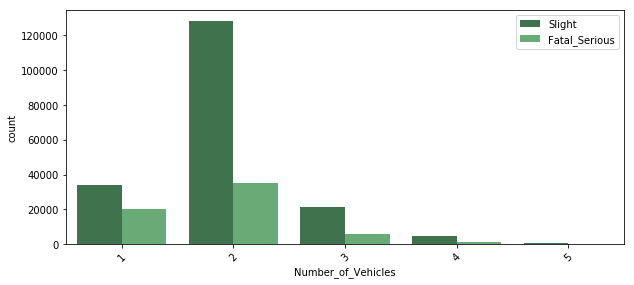

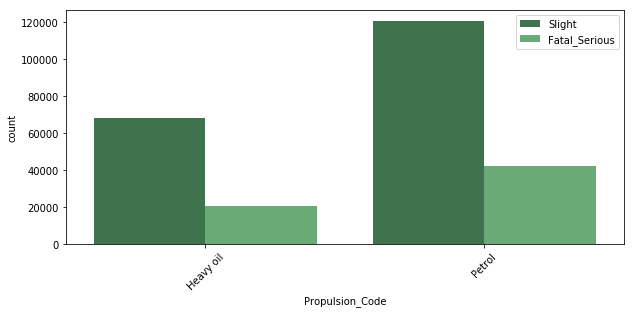

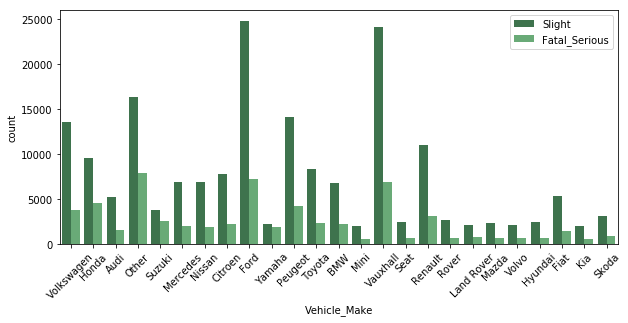

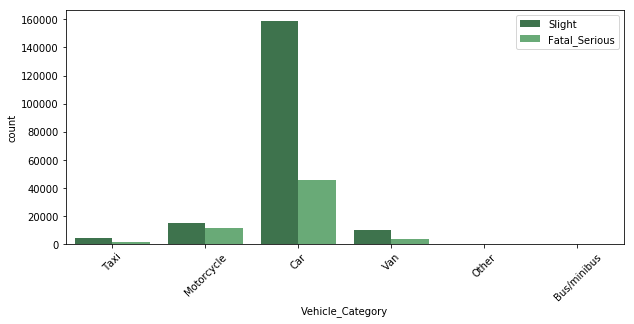

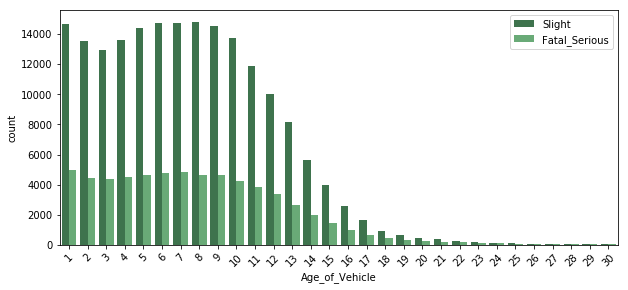

In [260]:
vehicle_features = ['Number_of_Vehicles','Propulsion_Code', 'Vehicle_Make', 'Vehicle_Category', 'Age_of_Vehicle']

for index, column in enumerate(vehicle_features):
    plt.figure(figsize=(10, 25))
    plt.subplot(5, 1, index+1)
    sns.countplot(x = vehicle_features[index], hue = 'Accident_Severity', data = accidents_raw, palette="Greens_d")
    plt.legend(loc='upper right')
    plt.xticks(rotation = 45)
plt.show()

In [261]:
for index, column in enumerate(vehicle_features):
    count_table = pd.crosstab(accidents["Accident_Severity"], accidents[vehicle_features[index]])
    count_table.loc['total'] = count_table.loc['Fatal_Serious'] + count_table.loc['Slight']
    count_table.loc['ratio'] = count_table.loc['Fatal_Serious'] / count_table.loc['Slight']    
    print ('-------------------------------------------------------------')
    print (count_table)

-------------------------------------------------------------
Number_of_Vehicles             1              2             3            4  \
Accident_Severity                                                            
Fatal_Serious       20380.000000   34930.000000   5661.000000  1484.000000   
Slight              33865.000000  128048.000000  21219.000000  4963.000000   
total               54245.000000  162978.000000  26880.000000  6447.000000   
ratio                   0.601801       0.272788      0.266789     0.299013   

Number_of_Vehicles            5  
Accident_Severity                
Fatal_Serious        361.000000  
Slight               921.000000  
total               1282.000000  
ratio                  0.391965  
-------------------------------------------------------------
Propulsion_Code       Heavy oil         Petrol
Accident_Severity                             
Fatal_Serious      20644.000000   42172.000000
Slight             68228.000000  120788.000000
total          

Ford and Vauxhall are the vehicles with the highest number of accidents in UK. This could be because it is commonly used compare to other vehicles. Yamaha, Suzuki and Honda in addition to vehicles labeled as "other" have a high fatal severity rate compare to other vehciles. It could be because many of these manufacturers produce motorcycles "Yamaha produce motorcycles and not cars", and the severity of motorcycles accidents is usually high

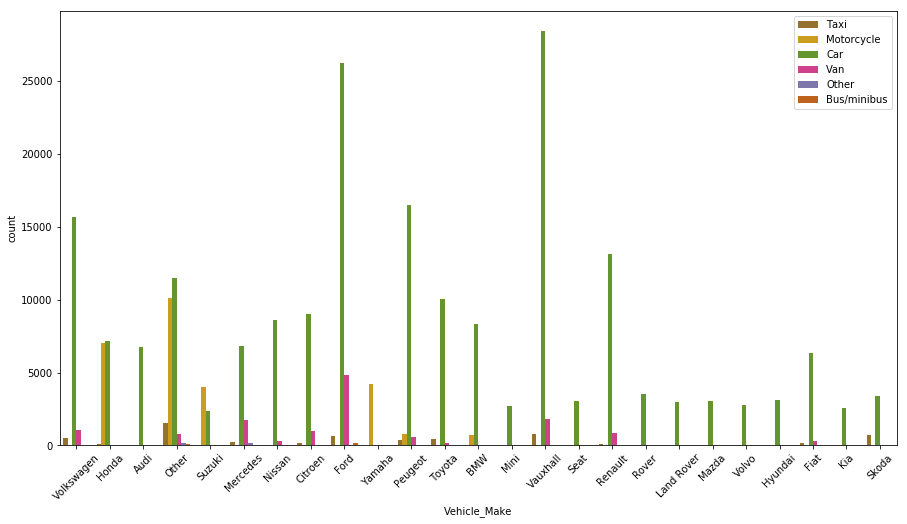

In [255]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Vehicle_Make', hue = 'Vehicle_Category', data = accidents, palette="Dark2_r")
plt.xticks(rotation = 45)
plt.legend(loc='upper right')

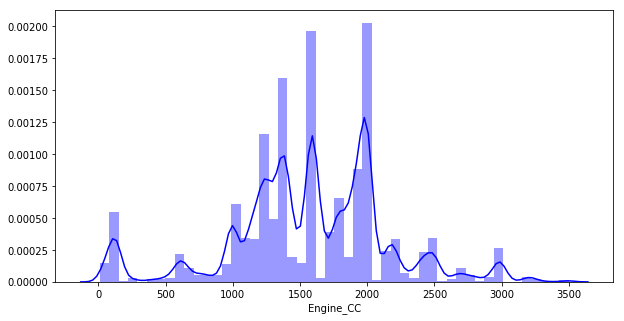

In [265]:
plt.figure(figsize = (10,5))
sns.distplot(accidents.Engine_CC, color = 'blue')

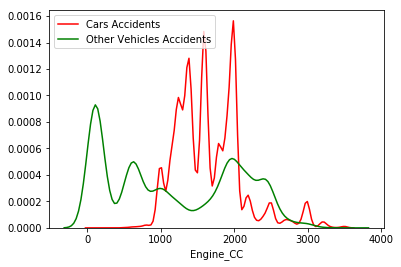

In [273]:
accidents_cars = accidents.loc[(accidents['Vehicle_Category'] == 'Car')]
accidents_others = accidents.loc[(accidents['Vehicle_Category'] != 'Car')]
sns.distplot(accidents_cars.Engine_CC, color = 'red', hist = False, label="Cars Accidents")
sns.distplot(accidents_others.Engine_CC, color = 'green', hist = False, label="Other Vehicles Accidents")

This confirms that motorcycles have the highest severity accidents among vehicles incolved in acciodents in UK. This shows that the difference in accident severity between vehicle manufactures might be due to the type of the vehicles produced and not quality of the maufacturer vehicles

## Severity of Accidents and Drivers

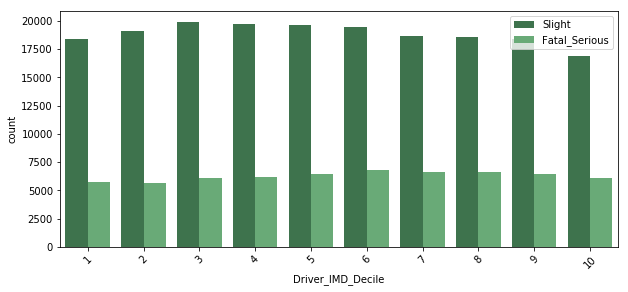

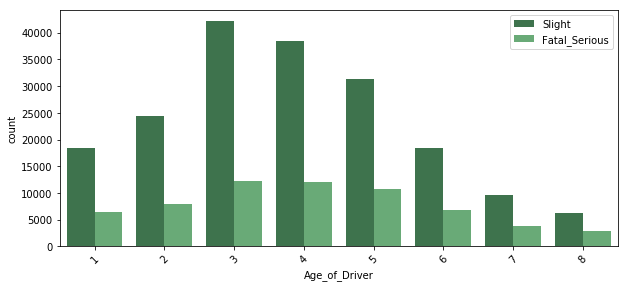

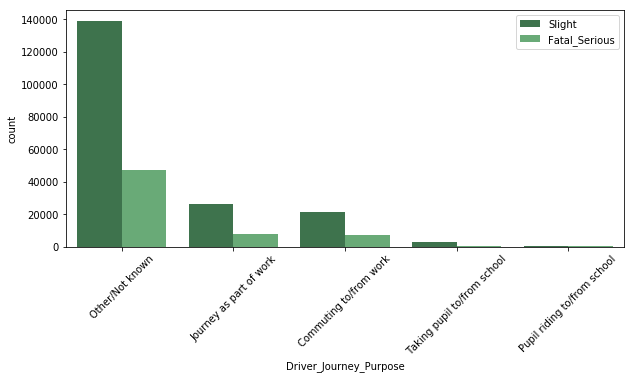

In [277]:
driver_features = ["Driver_IMD_Decile", 'Age_of_Driver', 'Driver_Journey_Purpose' ]

for index, column in enumerate(driver_features):
    plt.figure(figsize=(10, 20))
    plt.subplot(4, 1, index+1)
    sns.countplot(x = driver_features[index], hue = 'Accident_Severity', data = accidents_raw, palette="Greens_d")
    plt.legend(loc='upper right')
    plt.xticks(rotation = 45)
plt.show()

-------------------------------------------------------------
Driver_IMD_Decile             1            10             2             3  \
Accident_Severity                                                           
Fatal_Serious       5747.000000   6136.000000   5642.000000   6089.000000   
Slight             18370.000000  16888.000000  19148.000000  19931.000000   
total              24117.000000  23024.000000  24790.000000  26020.000000   
ratio                  0.312847      0.363335      0.294652      0.305504   

Driver_IMD_Decile            4             5             6             7  \
Accident_Severity                                                          
Fatal_Serious       6215.00000   6494.000000   6782.000000   6670.000000   
Slight             19776.00000  19679.000000  19446.000000  18712.000000   
total              25991.00000  26173.000000  26228.000000  25382.000000   
ratio                  0.31427      0.329996      0.348761      0.356456   

Driver_IMD_Decile 

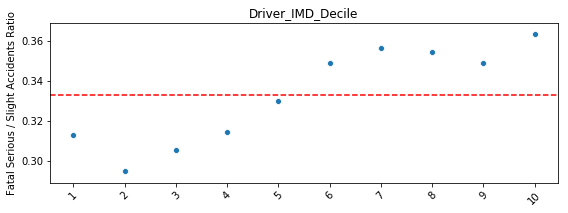

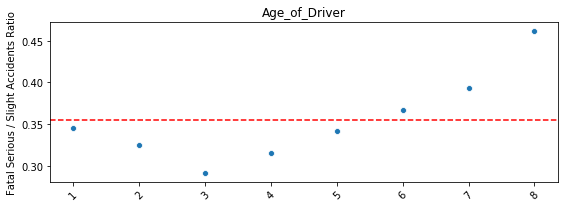

In [281]:
short_driver_features = ["Driver_IMD_Decile", 'Age_of_Driver']
for index, column in enumerate(short_driver_features):
    count_table = pd.crosstab(accidents["Accident_Severity"], accidents[short_driver_features[index]])
    count_table.loc['total'] = count_table.loc['Fatal_Serious'] + count_table.loc['Slight']
    count_table.loc['ratio'] = count_table.loc['Fatal_Serious'] / count_table.loc['Slight']    
    table = count_table.iloc[(count_table.index == 'ratio'), :]
    loc = list(map(float, count_table.columns))
    plt.figure(figsize=(20,10))
    for row in table.iterrows():
        plt.subplot(3,2,index+1)
        sns.scatterplot(x= loc, y = row[1])
        plt.xticks(np.arange(min(loc), max(loc)+1, 1.0), rotation = 45)
        plt.title(short_driver_features[index])
        plt.ylabel('Fatal Serious / Slight Accidents Ratio')
        plt.axhline(mean(row[1]), 0 ,max(loc)+1, color = 'red', linestyle = 'dashed')
    print ('-------------------------------------------------------------')
    print (count_table)

In [282]:
for index, column in enumerate(driver_features):
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(accidents["Accident_Severity"], 
                                                                   accidents[driver_features[index]]))
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(driver_features[index]))
    print("------------------------------------------------")
    print("Chi2 Stat = {}, p value = {}".format(chi2_stat, p_val))

------------------------------------------------
Comparisons for variable: Driver_IMD_Decile
------------------------------------------------
Chi2 Stat = 230.86462606177898, p value = 1.081777256431031e-44
------------------------------------------------
Comparisons for variable: Age_of_Driver
------------------------------------------------
Chi2 Stat = 552.9238341423453, p value = 3.3155669180836733e-115
------------------------------------------------
Comparisons for variable: Driver_Journey_Purpose
------------------------------------------------
Chi2 Stat = 153.03461579399263, p value = 4.553591753566767e-32


## Accident Severity and Accident, Road and Weather Conditions

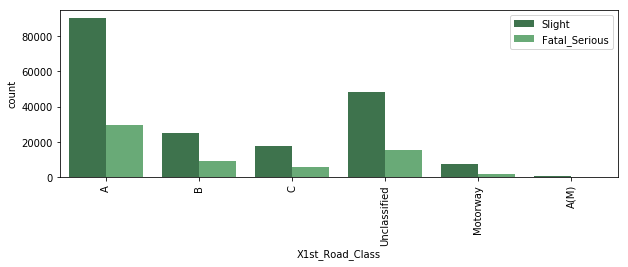

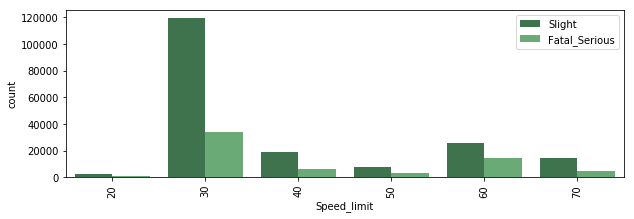

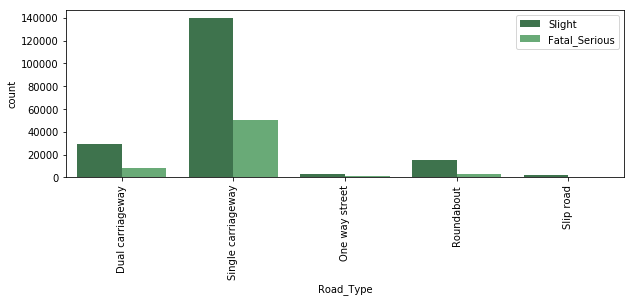

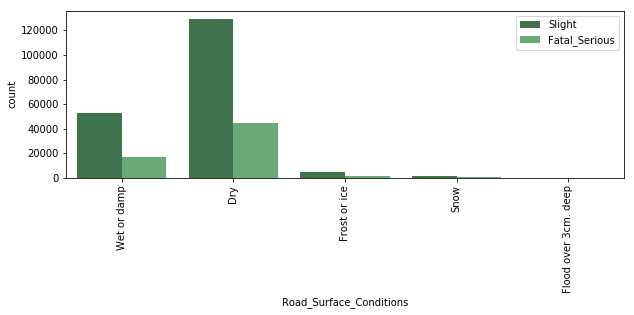

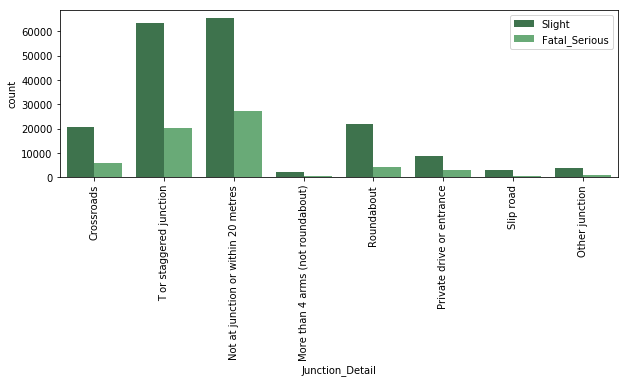

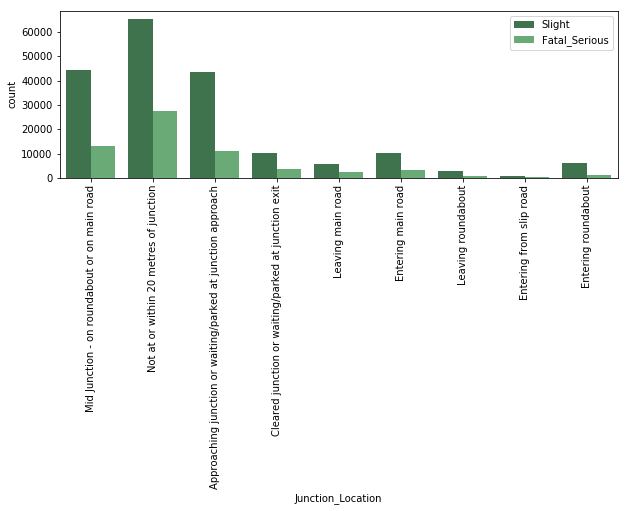

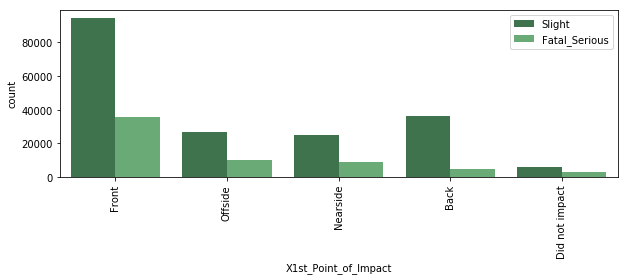

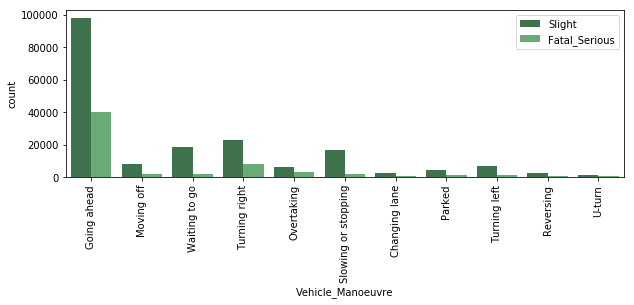

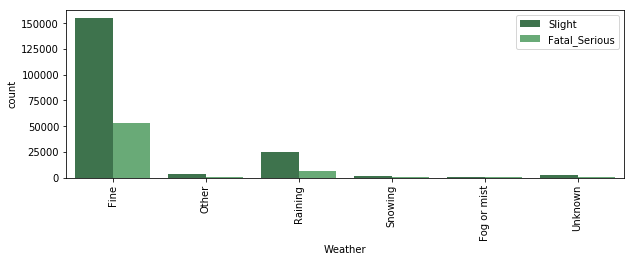

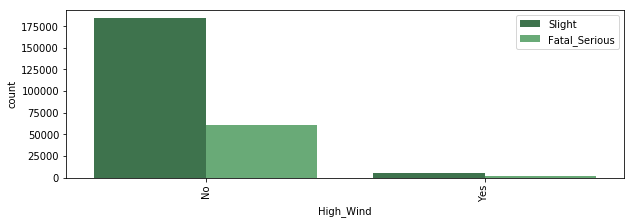

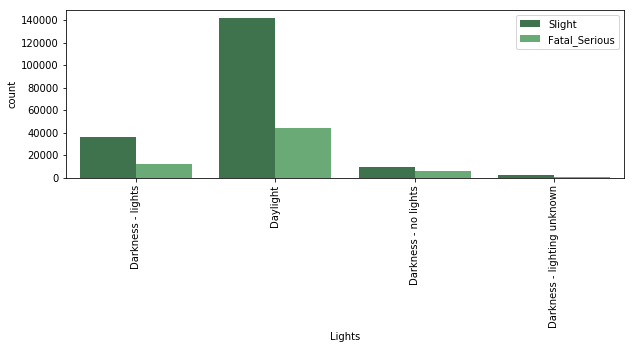

In [110]:
condition_features = ['X1st_Road_Class', 'Speed_limit', 'Road_Type', 'Road_Surface_Conditions', 'Junction_Detail', 
                      'Junction_Location', 'X1st_Point_of_Impact', 'Vehicle_Manoeuvre', 'Weather', 'High_Wind', 'Lights']

for index, column in enumerate(condition_features):
    plt.figure(figsize=(10, 40))
    plt.subplot(11, 1, index+1)
    sns.countplot(x = condition_features[index], hue = 'Accident_Severity', data = accidents_raw, palette="Greens_d")
    plt.legend(loc='upper right')
    plt.xticks(rotation = 90)
plt.show()

In [291]:
for index, column in enumerate(condition_features):
    count_table = pd.crosstab(accidents["Accident_Severity"], accidents[condition_features[index]])
    count_table.loc['total'] = count_table.loc['Fatal_Serious'] + count_table.loc['Slight']
    count_table.loc['ratio'] = count_table.loc['Fatal_Serious'] / count_table.loc['Slight']     
    print ('-------------------------------------------------------------')
    print (count_table) 

-------------------------------------------------------------
X1st_Road_Class                A        A(M)             B             C  \
Accident_Severity                                                          
Fatal_Serious       29828.000000  153.000000   9377.000000   6017.000000   
Slight              90230.000000  695.000000  24804.000000  17906.000000   
total              120058.000000  848.000000  34181.000000  23923.000000   
ratio                   0.330577    0.220144      0.378044      0.336033   

X1st_Road_Class       Motorway  Unclassified  
Accident_Severity                             
Fatal_Serious      1828.000000  15613.000000  
Slight             7262.000000  48119.000000  
total              9090.000000  63732.000000  
ratio                 0.251721      0.324466  
-------------------------------------------------------------
Speed_limit                 20             30            40            50  \
Accident_Severity                                           

-------------------------------------------------------------
Weather                     Fine  Fog or mist        Other      Raining  \
Accident_Severity                                                         
Fatal_Serious       53615.000000   376.000000   981.000000   6934.00000   
Slight             154805.000000  1041.000000  3812.000000  25000.00000   
total              208420.000000  1417.000000  4793.000000  31934.00000   
ratio                   0.346339     0.361191     0.257345      0.27736   

Weather                Snowing      Unknown  
Accident_Severity                            
Fatal_Serious       421.000000   489.000000  
Slight             1951.000000  2407.000000  
total              2372.000000  2896.000000  
ratio                 0.215787     0.203157  
-------------------------------------------------------------
High_Wind                     No          Yes
Accident_Severity                            
Fatal_Serious       61188.000000  1628.000000
Slight     

## Accident Severity and Location

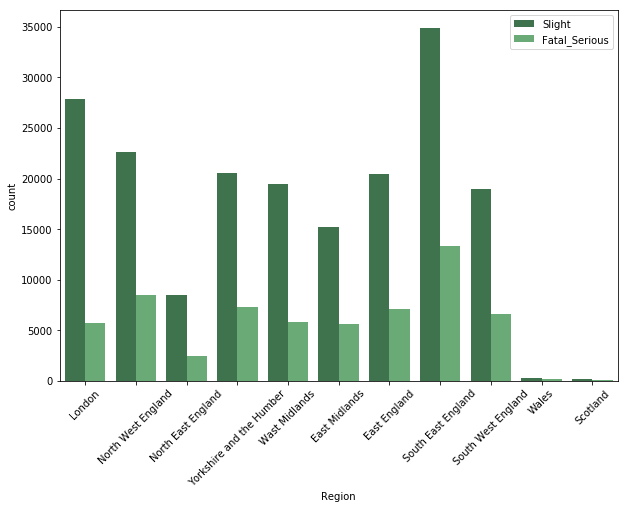

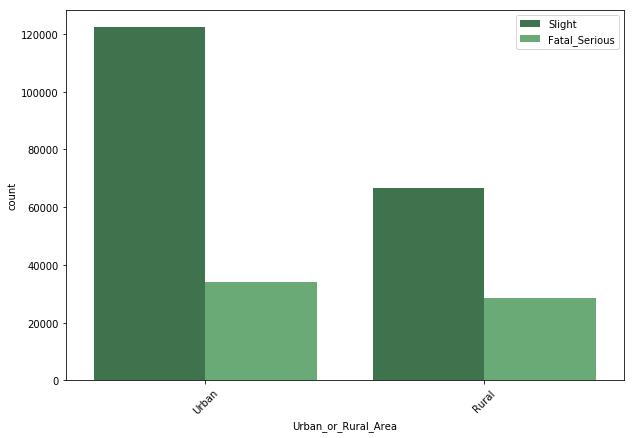

In [297]:
location_features = ['Region', 'Urban_or_Rural_Area']

for index, column in enumerate(location_features):
    plt.figure(figsize=(10, 15))
    plt.subplot(2, 1, index+1)
    sns.countplot(x = location_features[index], hue = 'Accident_Severity', data = accidents, palette="Greens_d")
    plt.legend(loc='upper right')
    plt.xticks(rotation = 45)
plt.show()

In [299]:
for index, column in enumerate(location_features):
    count_table = pd.crosstab(accidents["Accident_Severity"], accidents[location_features[index]])
    count_table.loc['total'] = count_table.loc['Fatal_Serious'] + count_table.loc['Slight']
    count_table.loc['ratio'] = count_table.loc['Fatal_Serious'] / count_table.loc['Slight']    
    print ('-------------------------------------------------------------')
    print (count_table)

-------------------------------------------------------------
Region             East England  East Midlands       London  \
Accident_Severity                                             
Fatal_Serious       7159.000000    5597.000000   5726.00000   
Slight             20406.000000   15244.000000  27914.00000   
total              27565.000000   20841.000000  33640.00000   
ratio                  0.350828       0.367161      0.20513   

Region             North East England  North West England    Scotland  \
Accident_Severity                                                       
Fatal_Serious             2494.000000         8460.000000  121.000000   
Slight                    8522.000000        22636.000000  173.000000   
total                    11016.000000        31096.000000  294.000000   
ratio                        0.292654            0.373741    0.699422   

Region             South East England  South West England       Wales  \
Accident_Severity                              

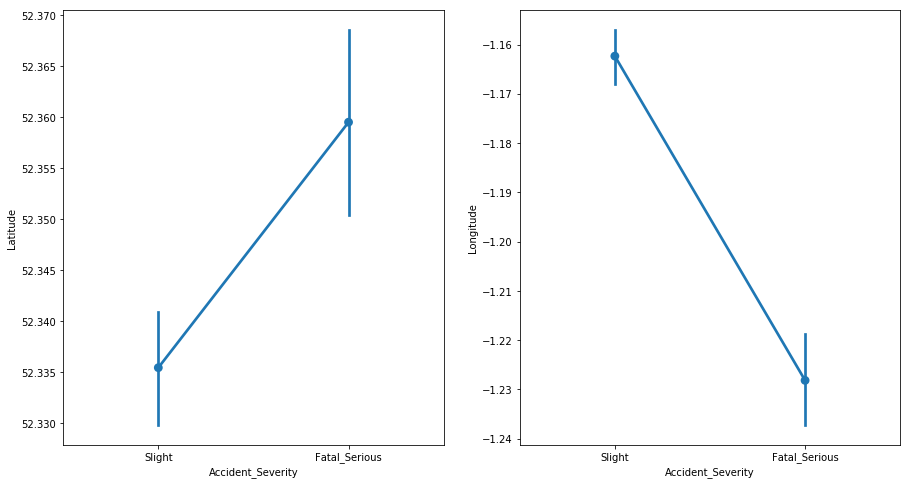

In [105]:
location = ['Latitude', 'Longitude']
plt.figure(figsize=(15,8))
for index, column in enumerate(location):
    plt.subplot(1,2,index+1)
    sns.pointplot(accidents["Accident_Severity"], accidents[location[index]])

In [301]:
severity = accidents["Accident_Severity"].unique()
severity_df = accidents.groupby("Accident_Severity")
for var in ['Latitude', 'Longitude']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    print("t-test between groups {0} and {1}:".format(severity[0], severity[1]))
    print(stats.ttest_ind(
       accidents[accidents["Accident_Severity"]==severity[0]][var], 
                accidents[accidents["Accident_Severity"]==severity[1]][var]
            ))

------------------------------------------------
Comparisons for variable: Latitude
------------------------------------------------
t-test between groups Slight and Fatal_Serious:
Ttest_indResult(statistic=-4.4995203453901995, pvalue=6.813736969854056e-06)
------------------------------------------------
Comparisons for variable: Longitude
------------------------------------------------
t-test between groups Slight and Fatal_Serious:
Ttest_indResult(statistic=11.761906454628253, pvalue=6.252665611583359e-32)


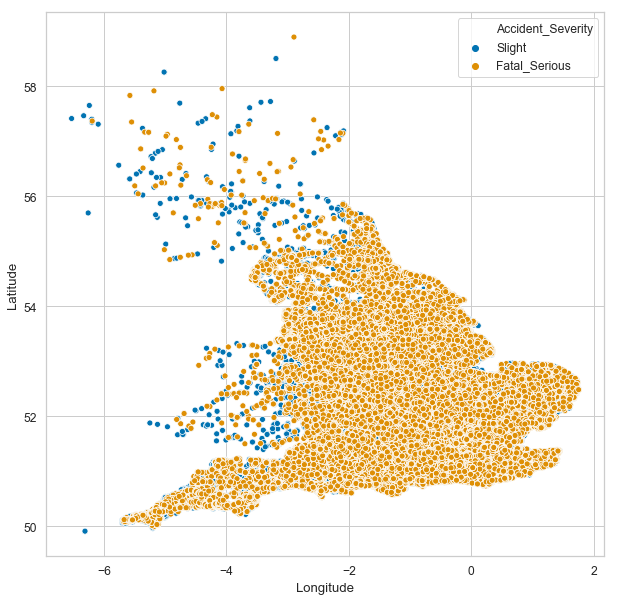

In [16]:
sns.scatterplot(x='Longitude', y='Latitude', hue = 'Accident_Severity', palette= 'colorblind', data=accidents)

The t-test results shows the following:
- Fatal and serious accidents accure in average more at the north east part of the UK while the slight accidents accure more at the south east part of the country
- The engine CC of the cars involved in the fatal sever accidents is smaller in average compare to the slight accidents.
- Fatal accidents occure more at later hours of the day compare to slight accidents

In [8]:
selected_features = ['Latitude', 'Longitude', 'Engine_CC', 'hour_of_day', 'Urban_or_Rural_Area', 'Driver_IMD_Decile', 
                     'Season', 'Day_of_Week', 'Age_of_Driver', 'Junction_Location', 'X1st_Road_Class', 
                     'X1st_Point_of_Impact']

# Random Forest 

In [29]:
X = accidents[selected_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_score = (cross_val_score(rfc, X, Y, cv=5))
print(rfc_score)
print("RFC Model Accuracy: %0.4f (+/- %0.4f)" % (rfc_score.mean(), rfc_score.std() * 2))

[0.73745235 0.73889132 0.74020172 0.73845451 0.7399039 ]
RFC Model Accuracy: 0.7390 (+/- 0.0020)


In [31]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

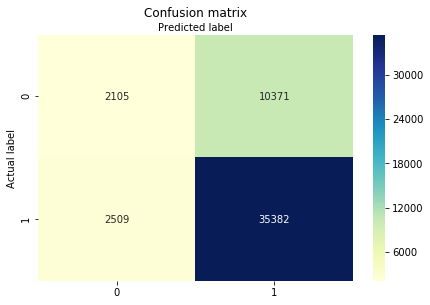

In [32]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.46      0.17      0.25     12476
       Slight       0.77      0.93      0.85     37891

    micro avg       0.74      0.74      0.74     50367
    macro avg       0.61      0.55      0.55     50367
 weighted avg       0.69      0.74      0.70     50367



In [34]:
predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.001960638324274688
Percent Type II errors: 8.934554389099843e-05

Test set accuracy:
Percent Type I errors: 0.2059086306510215
Percent Type II errors: 0.04981436257867254


# Naive Bayse

In [313]:
X = accidents[selected_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [321]:
bnb_score = (cross_val_score(bnb, X, Y, cv=5))
print(bnb_score)
print("BNB Model Accuracy: %0.4f (+/- %0.4f)" % (bnb_score.mean(), bnb_score.std() * 2))

[0.73526842 0.73984434 0.73982448 0.73865306 0.73996347]
BNB Model Accuracy: 0.7387 (+/- 0.0036)


In [322]:
y_pred = bnb.predict(X_test)
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

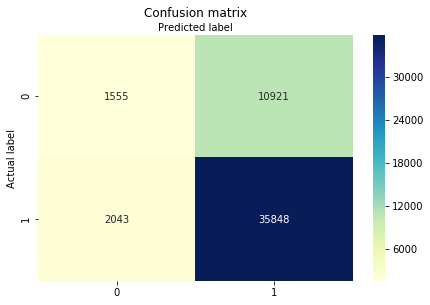

In [323]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.43      0.12      0.19     12476
       Slight       0.77      0.95      0.85     37891

    micro avg       0.74      0.74      0.74     50367
    macro avg       0.60      0.54      0.52     50367
 weighted avg       0.68      0.74      0.69     50367



In [326]:
predict_train = bnb.predict(X_train)
predict_test = bnb.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.22024172933263841
Percent Type II errors: 0.04080113171022262

Test set accuracy:
Percent Type I errors: 0.2168284789644013
Percent Type II errors: 0.04056227291679076


# KNN Nearest Neighbor 

In [328]:
X = accidents[selected_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [329]:
knn_score = (cross_val_score(knn, X, Y, cv=5))
print(knn_score)
print("KNN Model Accuracy: %0.4f (+/- %0.4f)" % (knn_score.mean(), knn_score.std() * 2))

[0.71338945 0.72020808 0.71611802 0.71848072 0.71742842]
KNN Model Accuracy: 0.7171 (+/- 0.0046)


In [330]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

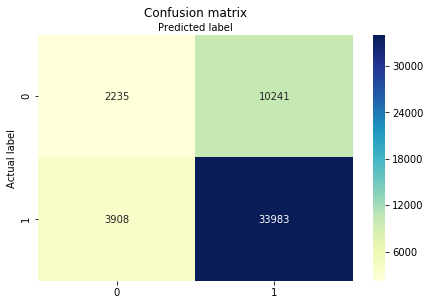

In [331]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [332]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.36      0.18      0.24     12476
       Slight       0.77      0.90      0.83     37891

    micro avg       0.72      0.72      0.72     50367
    macro avg       0.57      0.54      0.53     50367
 weighted avg       0.67      0.72      0.68     50367



In [333]:
predict_train = knn.predict(X_train)
predict_test = knn.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.16772640409004044
Percent Type II errors: 0.040751495296949845

Test set accuracy:
Percent Type I errors: 0.20332757559513173
Percent Type II errors: 0.0775904858339786


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = accidents[selected_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

logreg = LogisticRegression(solver= 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
logreg_score = (cross_val_score(logreg, X, Y, cv=5))
print(logreg_score)
print("Logestic Regression Model Accuracy: %0.4f (+/- %0.4f)" % (logreg_score.mean(), logreg_score.std() * 2))

[0.75182656 0.75090339 0.75134019 0.75157845 0.75155859]
Logestic Regression Model Accuracy: 0.7514 (+/- 0.0006)


In [17]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

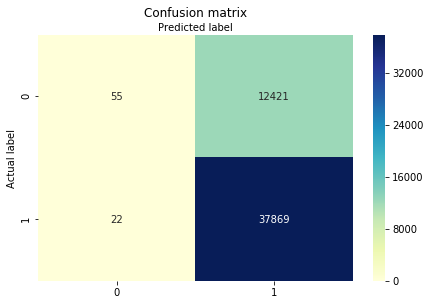

In [18]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.71      0.00      0.01     12476
       Slight       0.75      1.00      0.86     37891

    micro avg       0.75      0.75      0.75     50367
    macro avg       0.73      0.50      0.43     50367
 weighted avg       0.74      0.75      0.65     50367



# Gradient Boosting

In [20]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

X = accidents[selected_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}


clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [22]:
clf_score = (cross_val_score(clf, X, Y, cv=5))
print(clf_score)
print("Gradient Boosting Accuracy: %0.4f (+/- %0.4f)" % (clf_score.mean(), clf_score.std() * 2))

[0.75456639 0.75487432 0.75390144 0.75439781 0.75485447]
Gradient Boosting Accuracy: 0.7545 (+/- 0.0007)


In [23]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

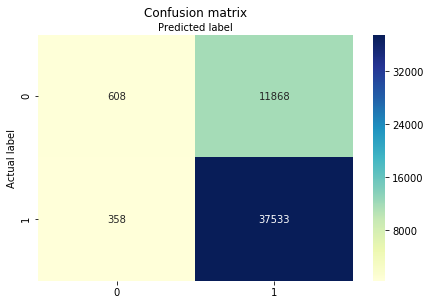

In [24]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.63      0.05      0.09     12476
       Slight       0.76      0.99      0.86     37891

    micro avg       0.76      0.76      0.76     50367
    macro avg       0.69      0.52      0.48     50367
 weighted avg       0.73      0.76      0.67     50367



In [26]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.23902911175638447
Percent Type II errors: 0.006919316010225101

Test set accuracy:
Percent Type I errors: 0.23563047233307524
Percent Type II errors: 0.00710782853852721


Selected model is Random Forest because it is the best model in correctly identifying fetal accident despite slightly higher predection accuracy for othger models

## Feature Importance

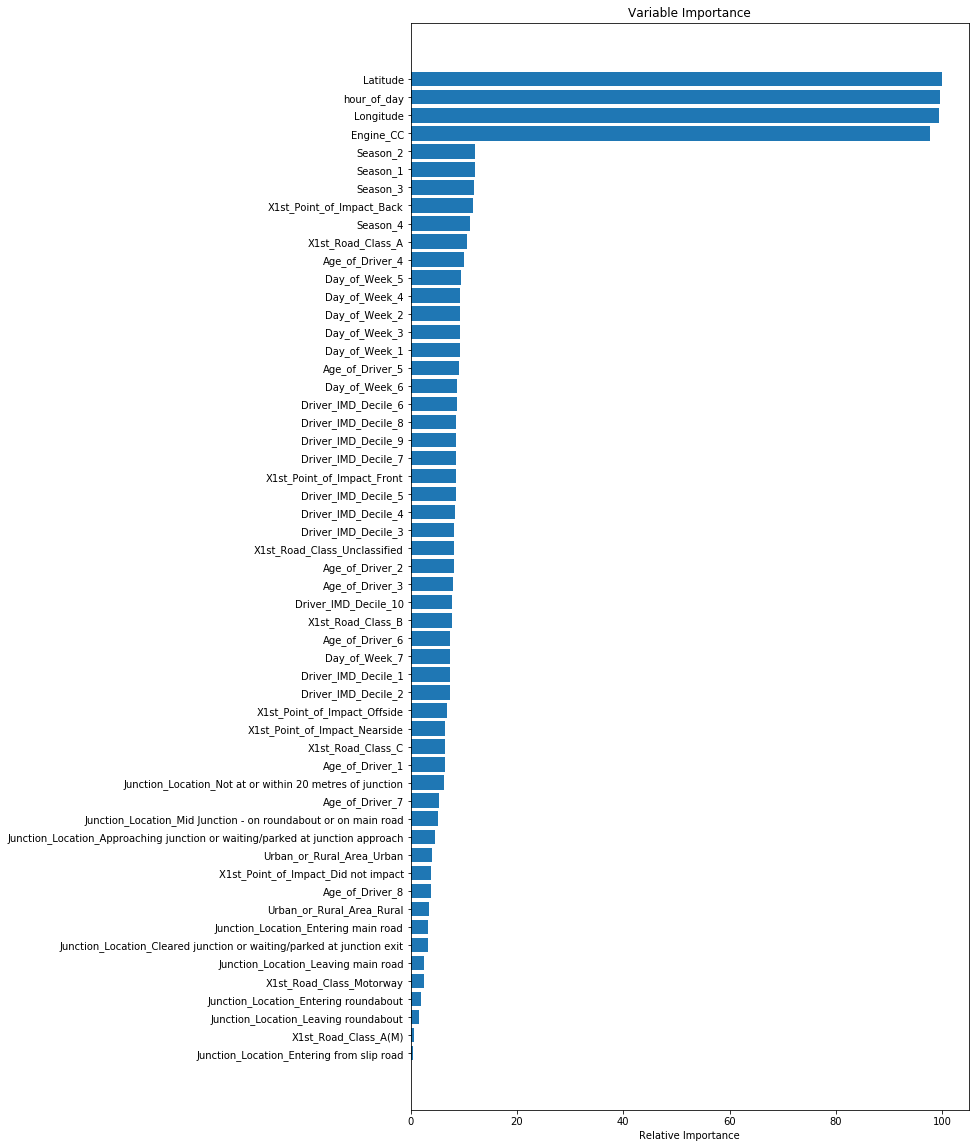

In [35]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(10,20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [64]:
top_features =[]
for i in sorted_idx:
    if feature_importance[sorted_idx[i]] >= 20:
        top_features.append(X.columns[sorted_idx[i]])

# Random Forest Model 2

In [37]:
X = accidents[top_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_score = (cross_val_score(rfc, X, Y, cv=5))
print(rfc_score)
print("RFC Model Accuracy: %0.4f (+/- %0.4f)" % (rfc_score.mean(), rfc_score.std() * 2))

[0.71710213 0.72499305 0.72167732 0.72014851 0.72163761]
RFC Model Accuracy: 0.7211 (+/- 0.0051)


In [40]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

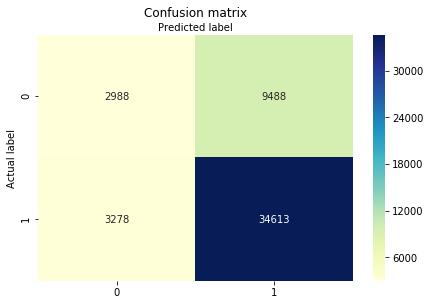

In [41]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.48      0.24      0.32     12476
       Slight       0.78      0.91      0.84     37891

    micro avg       0.75      0.75      0.75     50367
    macro avg       0.63      0.58      0.58     50367
 weighted avg       0.71      0.75      0.71     50367



In [44]:
predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0024967115876206787
Percent Type II errors: 0.00018365472910927456

Test set accuracy:
Percent Type I errors: 0.18837731054063175
Percent Type II errors: 0.06508229594774356


# Random Forest Model 3

In [45]:
X = accidents[top_features]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfc_score = (cross_val_score(rfc, X, Y, cv=5))
print(rfc_score)
print("RFC Model Accuracy: %0.4f (+/- %0.4f)" % (rfc_score.mean(), rfc_score.std() * 2))

[0.73373968 0.73958623 0.73771989 0.73646905 0.7369257 ]
RFC Model Accuracy: 0.7369 (+/- 0.0038)


In [47]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

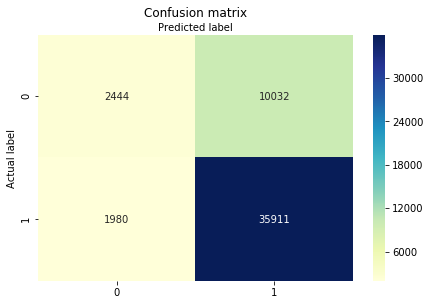

In [48]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.55      0.20      0.29     12476
       Slight       0.78      0.95      0.86     37891

    micro avg       0.76      0.76      0.76     50367
    macro avg       0.67      0.57      0.57     50367
 weighted avg       0.72      0.76      0.72     50367



In [50]:
predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc['Fatal_Serious','Slight'] / table_train.loc['All','All']
train_tII_errors = table_train.loc['Slight','Fatal_Serious'] / table_train.loc['All','All']

test_tI_errors = table_test.loc['Fatal_Serious','Slight']/table_test.loc['All','All']
test_tII_errors = table_test.loc['Slight','Fatal_Serious']/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.1991780332360474
Percent Type II errors: 0.039311453928167255


In [68]:
X = accidents[selected_features]
X = pd.get_dummies(X)

top_features2 =[]
for i in sorted_idx:
    if feature_importance[sorted_idx[i]] > 10:
        top_features2.append(X.columns[sorted_idx[i]])

In [85]:
top_features2

['X1st_Road_Class_A',
 'Season_3',
 'Engine_CC',
 'X1st_Point_of_Impact_Back',
 'hour_of_day',
 'Latitude',
 'Season_4',
 'Season_1',
 'Longitude',
 'Age_of_Driver_4',
 'Season_2']

# Random Forest Model 4

In [111]:
X = accidents[['X1st_Road_Class','Season', 'Engine_CC', 'X1st_Point_of_Impact', 'hour_of_day', 'Latitude', 'Longitude',
 'Age_of_Driver']]
X = pd.get_dummies(X)
Y = accidents.Accident_Severity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

rfc = RandomForestClassifier(n_estimators=20, criterion = 'entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
rfc_score = (cross_val_score(rfc, X, Y, cv=5))
print(rfc_score)
print("RFC Model Accuracy: %0.4f (+/- %0.4f)" % (rfc_score.mean(), rfc_score.std() * 2))

[0.72621506 0.72981773 0.72582695 0.72503276 0.72826907]
RFC Model Accuracy: 0.7270 (+/- 0.0035)


In [81]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

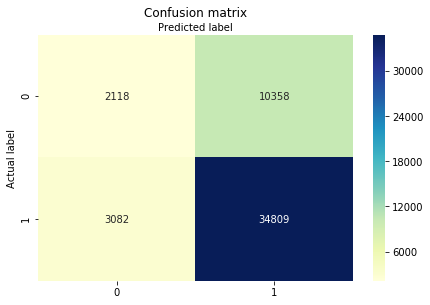

In [82]:
class_names=['Fatal_Serious', 'Slight'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.41      0.17      0.24     12476
       Slight       0.77      0.92      0.84     37891

    micro avg       0.73      0.73      0.73     50367
    macro avg       0.59      0.54      0.54     50367
 weighted avg       0.68      0.73      0.69     50367



Best Model is Random Forest 2